In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from river import drift

Change detected at index 5215, input value: 4


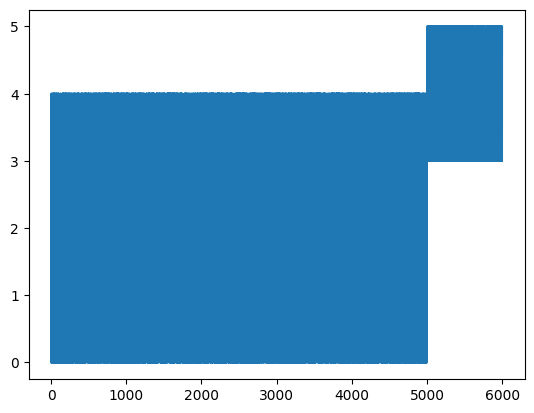

In [2]:
rng = random.Random(12345)
adwin = drift.ADWIN()

data_stream = rng.choices([0, 1, 3, 4], k=5000) + rng.choices(range(3, 6), k=1000)

plt.plot(data_stream)

for i, val in enumerate(data_stream):
    adwin.update(val)
    if adwin.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")

In [5]:
DATA_PATH = '../data/processed/EEA-SK-Ba-trend.csv'
df = pd.read_csv(DATA_PATH)
df = df[['DatetimeBegin', 'PM10 Concentration', 'PM2.5 Concentration', 'NO2 Concentration']]

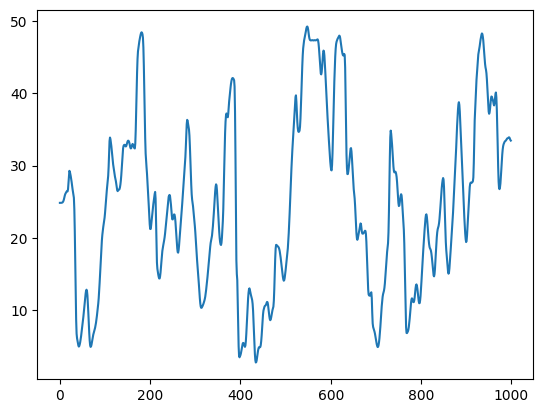

In [7]:
plt.plot(df['PM10 Concentration'][:1000])

Change detected at index 287, input value: 34.164780444163405
Change detected at index 479, input value: 19.03617864062723
Change detected at index 671, input value: 20.587587769362266
Change detected at index 959, input value: 39.13117972895039
Change detected at index 1151, input value: 23.90057104672392
Change detected at index 1343, input value: 30.26965162167851
Change detected at index 1439, input value: 46.394043631171634
Change detected at index 1535, input value: 48.093283956402885
Change detected at index 1727, input value: 7.827035344798681
Change detected at index 1919, input value: 16.82097349525167
Change detected at index 2207, input value: 14.691102268438698
Change detected at index 2399, input value: 11.242934459638027


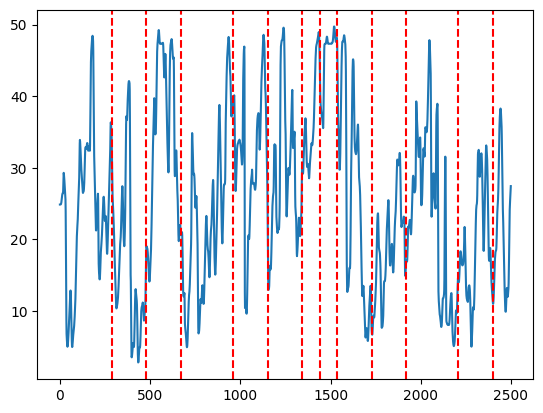

In [28]:
adwin = drift.ADWIN(
    delta=0.00001,
    grace_period=50,
    clock=96
)

drifts = []

for i, val in enumerate(df['PM10 Concentration'][:2500].tolist()):
    adwin.update(val)
    if adwin.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")
        drifts.append(i)

plt.plot(df['PM10 Concentration'][:2500])
for d in drifts:
    plt.axvline(x=d, color='r', linestyle='--')
plt.show()

Change detected at index 91, input value: 17.38119888861387
Change detected at index 187, input value: 40.34876921087469
Change detected at index 475, input value: 12.921008031706789
Change detected at index 667, input value: 21.938079021780304
Change detected at index 955, input value: 39.21810155838744
Change detected at index 1051, input value: 21.03870495268044
Change detected at index 1339, input value: 24.822914263507144
Change detected at index 1435, input value: 48.96395053169084
Change detected at index 1627, input value: 44.8557673298758
Change detected at index 1723, input value: 13.323583507987207
Change detected at index 1915, input value: 15.225980273101998
Change detected at index 2107, input value: 9.240590955759725
Change detected at index 2395, input value: 12.77223905434292


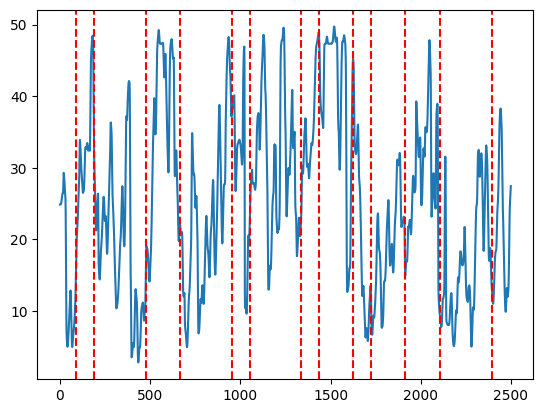

In [29]:
pagehinkey = drift.PageHinkley(
    min_instances=96,
    threshold=50.0
)

drifts = []

for i, val in enumerate(df['PM10 Concentration'][:2500].tolist()):
    adwin.update(val)
    if adwin.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")
        drifts.append(i)

plt.plot(df['PM10 Concentration'][:2500])
for d in drifts:
    plt.axvline(x=d, color='r', linestyle='--')
plt.show()